# Iman Noor
## ByteWise Fellow

# **Advanced plotting techniques (subplots, histograms, box plots)**
#### Subplots
Subplots in Matplotlib allow you to create multiple plots within the same figure, facilitating comparison and visualization of different datasets or aspects of your data.

#### Histograms
Histograms are useful for visualizing the distribution of numerical data, showing the frequency of data points within specified bins. They can be created using `plt.hist()` in Matplotlib. Adjusting the `bins` parameter controls the granularity of the histogram, while `density=True` normalizes the plot to show proportions rather than counts.

#### Box Plots
Box plots are effective for displaying the distribution, skewness, and potential outliers of numerical data through quartiles. They are generated using `plt.boxplot()` in Matplotlib. Box plots display the median, quartiles, and potential outliers of the data, providing a concise summary of its distribution.

#### Customization
Matplotlib offers extensive customization options for plots, including color, labels, titles, annotations, and styling of plot elements. Customizing plots involves setting parameters like `xlabel`, `ylabel`, `title`, `legend`, `color`, and adjusting plot dimensions (`figsize`) to improve readability and visual appeal.

# Creating multiple subplots using plt.subplots

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Polygon

# Creating a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)

# Fixing random state for reproducibility
np.random.seed(19680801)

In [2]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

## A figure with just one subplot
- `subplots()` without arguments returns a `Figure` and a single `Axes`.

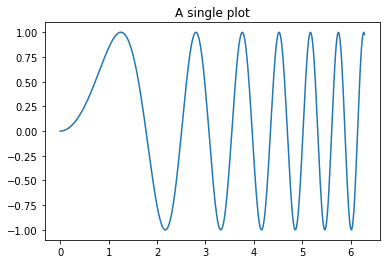

In [3]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('A single plot')
plt.show()

## Stacking subplots in one direction
- The first two optional arguments of `pyplot.subplots` define the number of rows and columns of the subplot grid.
- When stacking in one direction only, the returned `axs` is a 1D numpy array containing the list of created Axes.

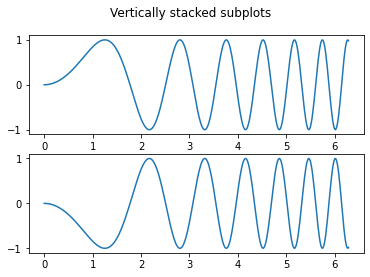

In [4]:
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(x, y)
axs[1].plot(x, -y)
plt.show()

*use ax1 instead of the more verbose axs[0].*

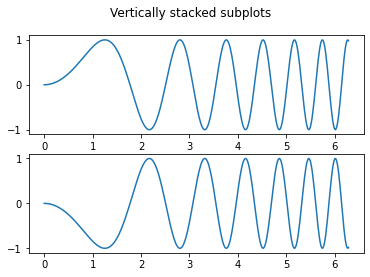

In [5]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)
plt.show()

*To obtain side-by-side subplots, pass parameters `1, 2` for one row and two columns.*

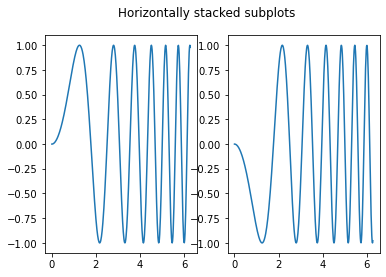

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.plot(x, y)
ax2.plot(x, -y)
plt.show()

## Stacking subplots in two directions
- When stacking in two directions, the returned `axs` is a 2D NumPy array.

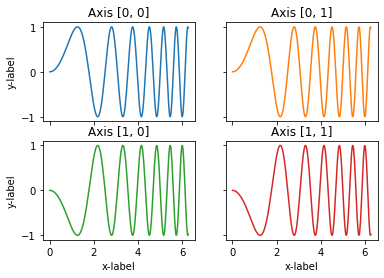

In [7]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()

*tuple-unpacking is also used in 2D to assign all subplots to dedicated variables:*

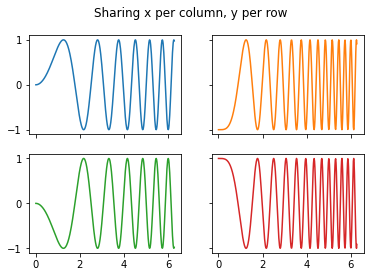

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

## Sharing axes
By default, each Axes is scaled individually. Thus, if the ranges are different the tick values of the subplots do not align.

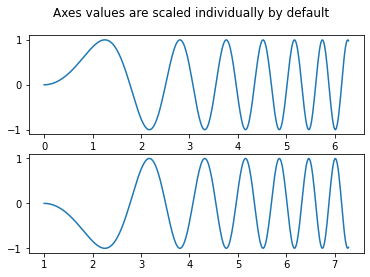

In [9]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Axes values are scaled individually by default')
ax1.plot(x, y)
ax2.plot(x+1, -y)
plt.show()

*`sharex` or `sharey` is used to align the horizontal or vertical axis.*

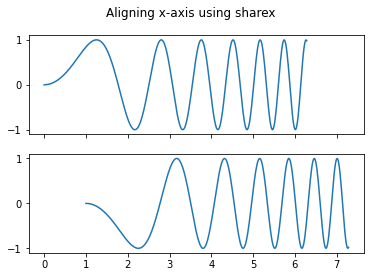

In [10]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Aligning x-axis using sharex')
ax1.plot(x, y)
ax2.plot(x+1, -y)
plt.show()

*Setting sharex or sharey to `True` enables global sharing across the whole grid, i.e. also the y-axes of vertically stacked subplots have the same scale when using `sharey=True.`*

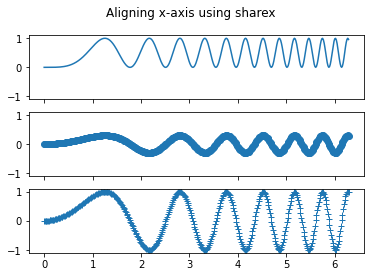

In [11]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Aligning x-axis using sharex')
axs[0].plot(x, y**2)
axs[1].plot(x, 0.3*y, 'o')
axs[2].plot(x, y, '+')
plt.show()

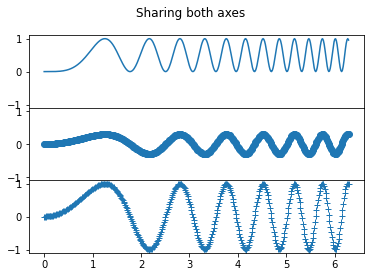

In [12]:
fig = plt.figure()
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Sharing both axes')
axs[0].plot(x, y**2)
axs[1].plot(x, 0.3*y, 'o')
axs[2].plot(x, y, '+')

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

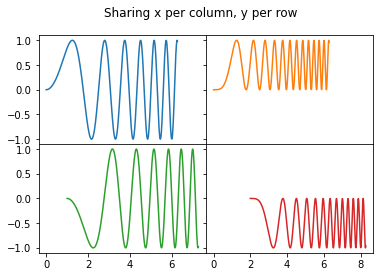

In [13]:
fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x + 1, -y, 'tab:green')
ax4.plot(x + 2, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()

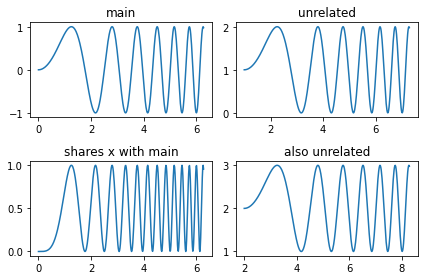

In [14]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, y)
axs[0, 0].set_title("main")
axs[1, 0].plot(x, y**2)
axs[1, 0].set_title("shares x with main")
axs[1, 0].sharex(axs[0, 0])
axs[0, 1].plot(x + 1, y + 1)
axs[0, 1].set_title("unrelated")
axs[1, 1].plot(x + 2, y + 2)
axs[1, 1].set_title("also unrelated")
fig.tight_layout()

## Polar Axes
- The parameter subplot_kw of `pyplot.subplots` controls the subplot properties. 
- In particular, this can be used to create a grid of polar Axes.

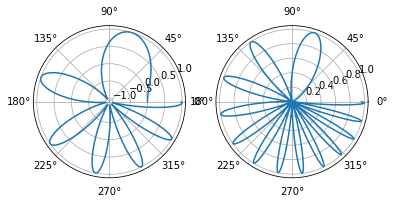

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw=dict(projection='polar'))
ax1.plot(x, y)
ax2.plot(x, y**2)
plt.show()

# Histograms
## Generate data and plot a simple histogram

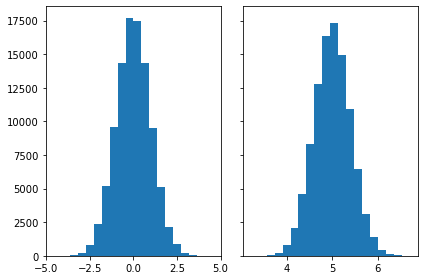

In [16]:
N_points = 100000
n_bins = 20

# Generating 2 normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4*rng.standard_normal(N_points) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can also set the number of bins using 'bins' keyword argument
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)
plt.show()

## Updating histogram colors
- The histogram method returns (among other things) a `patches` object. 
- This gives us access to the properties of the objects drawn. Using this, we can edit the histogram to our liking.

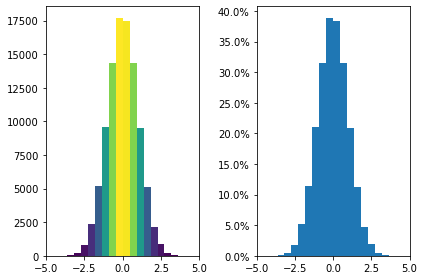

In [17]:
fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(dist1, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(dist1, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

## Plot a 2D histogram

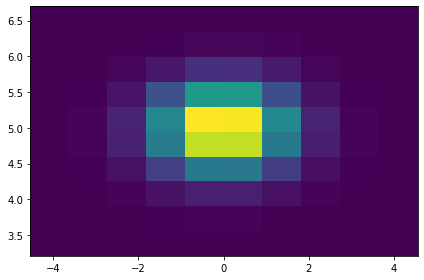

In [18]:
fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(dist1, dist2)

## Customizing your histogram
- Customizing a 2D histogram is similar to the 1D case, you can control visual components such as the bin size or color normalization.

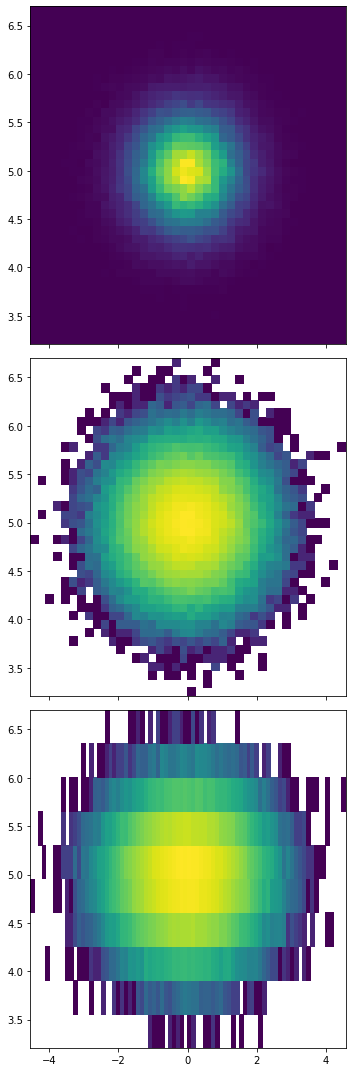

In [19]:
fig, axs = plt.subplots(3, 1, figsize=(5, 15), sharex=True, sharey=True,
                        tight_layout=True)

# We can increase the number of bins on each axis
axs[0].hist2d(dist1, dist2, bins=40)

# As well as define normalization of the colors
axs[1].hist2d(dist1, dist2, bins=40, norm=colors.LogNorm())

# We can also define custom numbers of bins for each axis
axs[2].hist2d(dist1, dist2, bins=(80, 10), norm=colors.LogNorm())
plt.show()

## Boxplots

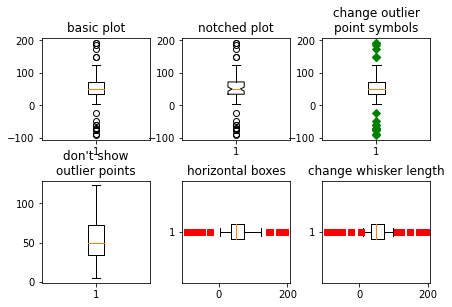

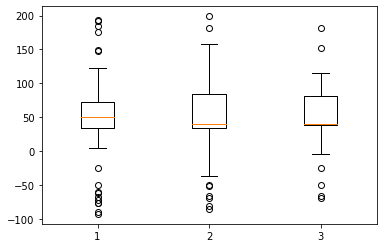

In [20]:
# fake up some data
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

fig, axs = plt.subplots(2, 3)

# basic plot
axs[0, 0].boxplot(data)
axs[0, 0].set_title('basic plot')

# notched plot
axs[0, 1].boxplot(data, 1)
axs[0, 1].set_title('notched plot')

# change outlier point symbols
axs[0, 2].boxplot(data, 0, 'gD')
axs[0, 2].set_title('change outlier\npoint symbols')

# don't show outlier points
axs[1, 0].boxplot(data, 0, '')
axs[1, 0].set_title("don't show\noutlier points")

# horizontal boxes
axs[1, 1].boxplot(data, 0, 'rs', 0)
axs[1, 1].set_title('horizontal boxes')

# change whisker length
axs[1, 2].boxplot(data, 0, 'rs', 0, 0.75)
axs[1, 2].set_title('change whisker length')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

# fake up some more data
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))
# Making a 2-D array only works if all the columns are the same length.  If they are not, then use a list instead. This is actually more efficient because boxplot converts a 2-D array into a list of vectors internally anyway.
data = [data, d2, d2[::2]]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

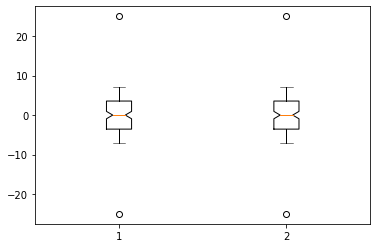

In [21]:
x = np.linspace(-7, 7, 140)
x = np.hstack([-25, x, 25])
fig, ax = plt.subplots()

boxplot = ax.boxplot([x, x], notch=True)
for cap in boxplot['caps']:
    cap.set_linewidth(0.5) 

plt.show()

# **Subplots:**
1. Generate a figure with 2x2 subplots, each containing a different type of plot (e.g., line plot, scatter plot, bar plot, and histogram).
2. Customize the subplots with titles, axis labels, and legends.

## 1. Generate a figure with 2x2 subplots, each containing a different type of plot (e.g., line plot, scatter plot, bar plot, and histogram).

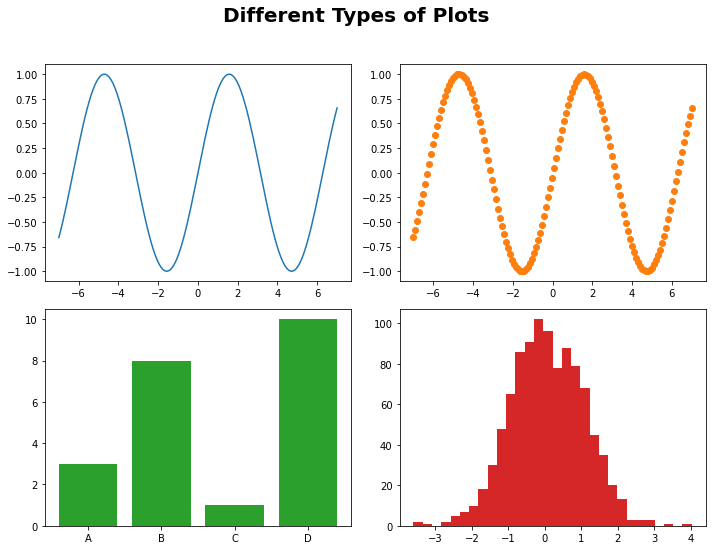

In [22]:
# Generate data
x = np.linspace(-7, 7, 140)
y = np.sin(x)
x_bar = ['A', 'B', 'C', 'D']
y_bar = [3, 8, 1, 10]
data = np.random.randn(1000)

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Different Types of Plots', weight='bold', fontsize=20)

# Line plot
axs[0, 0].plot(x, y, label='sin(x)')

# Scatter plot
axs[0, 1].scatter(x, y, color='tab:orange', label='sin(x)')

# Bar plot
axs[1, 0].bar(x_bar, y_bar, color='tab:green', label='Bar heights')

# Histogram
axs[1, 1].hist(data, bins=30, color='tab:red', label='Random data')

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 2. Customize the subplots with titles, axis labels, and legends.

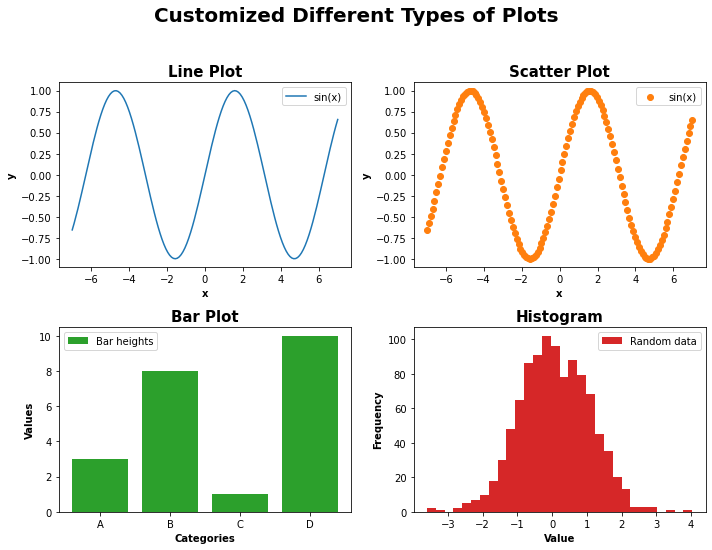

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Customized Different Types of Plots', weight='bold', fontsize=20)

# Line plot
axs[0, 0].plot(x, y, label='sin(x)')
axs[0, 0].set_title('Line Plot', weight='bold', fontsize=15)
axs[0, 0].set_xlabel('x', weight='bold')
axs[0, 0].set_ylabel('y', weight='bold')
axs[0, 0].legend()

# Scatter plot
axs[0, 1].scatter(x, y, color='tab:orange', label='sin(x)')
axs[0, 1].set_title('Scatter Plot', weight='bold', fontsize=15)
axs[0, 1].set_xlabel('x', weight='bold')
axs[0, 1].set_ylabel('y', weight='bold')
axs[0, 1].legend()

# Bar plot
axs[1, 0].bar(x_bar, y_bar, color='tab:green', label='Bar heights')
axs[1, 0].set_title('Bar Plot', weight='bold', fontsize=15)
axs[1, 0].set_xlabel('Categories', weight='bold')
axs[1, 0].set_ylabel('Values', weight='bold')
axs[1, 0].legend()

# Histogram
axs[1, 1].hist(data, bins=30, color='tab:red', label='Random data')
axs[1, 1].set_title('Histogram', weight='bold', fontsize=15)
axs[1, 1].set_xlabel('Value', weight='bold')
axs[1, 1].set_ylabel('Frequency', weight='bold')
axs[1, 1].legend()

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 👥 Human Resources Dataset 👨‍💼

In [24]:
df = pd.read_csv('HRDataset_v14.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


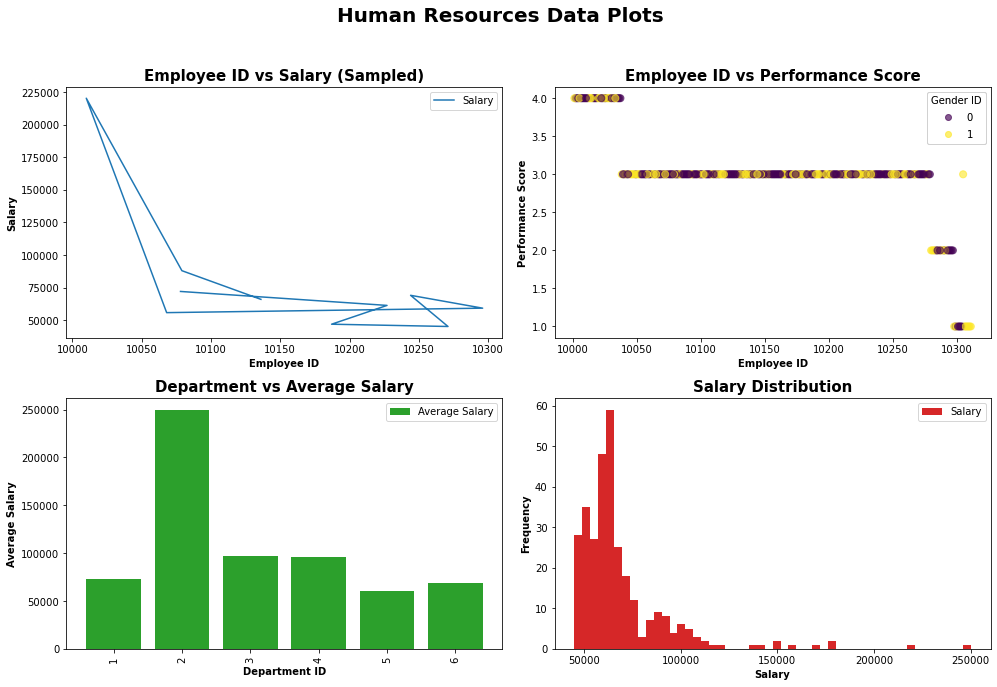

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Human Resources Data Plots', weight='bold', fontsize=20)

# Line plot
sampled_df = df.sample(10, random_state=1)
axs[0, 0].plot(sampled_df['EmpID'], sampled_df['Salary'], label='Salary')
axs[0, 0].set_title('Employee ID vs Salary (Sampled)', weight='bold', fontsize=15)
axs[0, 0].set_xlabel('Employee ID', weight='bold')
axs[0, 0].set_ylabel('Salary', weight='bold')
axs[0, 0].legend()

# Scatter plot
scatter = axs[0, 1].scatter(df['EmpID'], df['PerfScoreID'], c=df['GenderID'], cmap='viridis', alpha=0.6, s=50)
axs[0, 1].set_title('Employee ID vs Performance Score', weight='bold', fontsize=15)
axs[0, 1].set_xlabel('Employee ID', weight='bold')
axs[0, 1].set_ylabel('Performance Score', weight='bold')
legend1 = axs[0, 1].legend(*scatter.legend_elements(), title="Gender ID")
axs[0, 1].add_artist(legend1)

# Bar plot
dept_salary_mean = df.groupby('DeptID')['Salary'].mean()
axs[1, 0].bar(dept_salary_mean.index, dept_salary_mean.values, color='tab:green', label='Average Salary')
axs[1, 0].set_title('Department vs Average Salary', weight='bold', fontsize=15)
axs[1, 0].set_xlabel('Department ID', weight='bold')
axs[1, 0].set_ylabel('Average Salary', weight='bold')
axs[1, 0].legend()
axs[1, 0].tick_params(axis='x', rotation=90)

# Histogram
axs[1, 1].hist(df['Salary'], bins=50, color='tab:red', label='Salary')
axs[1, 1].set_title('Salary Distribution', weight='bold', fontsize=15)
axs[1, 1].set_xlabel('Salary', weight='bold')
axs[1, 1].set_ylabel('Frequency', weight='bold')
axs[1, 1].legend()

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **Histograms:**
1. Create a histogram for a given numerical data set. Customize the number of bins.
2. Plot multiple histograms on the same figure to compare different data sets.
3. Normalize the histograms and add appropriate labels and titles.

## 1. Create a histogram for a given numerical data set. Customize the number of bins.

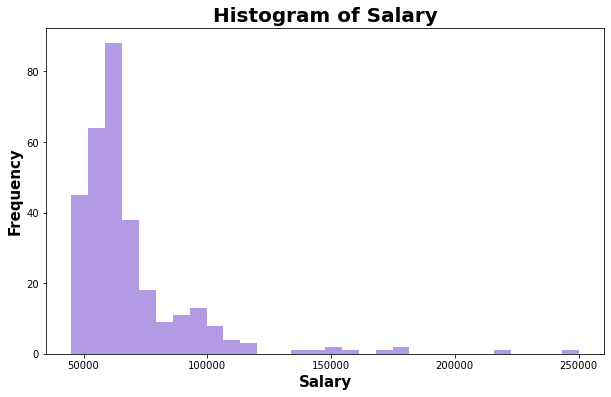

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['Salary'], bins=30, color='#9370DB', alpha=0.7)
plt.title('Histogram of Salary', weight='bold', fontsize=20)
plt.xlabel('Salary', weight='bold', fontsize=15)
plt.ylabel('Frequency', weight='bold', fontsize=15)
plt.show()

## 2. Plot multiple histograms on the same figure to compare different data sets.

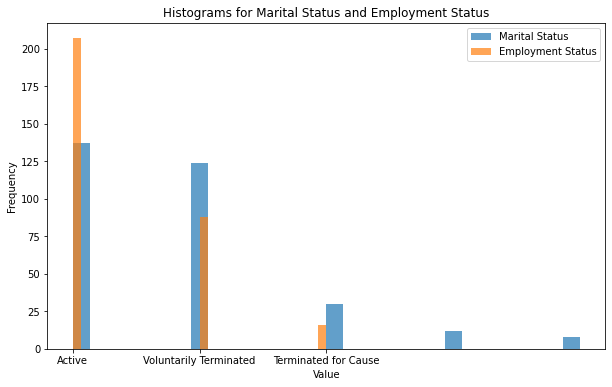

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['MaritalStatusID'], bins=30, alpha=0.7, label='Marital Status')
plt.hist(df['EmploymentStatus'], bins=30, alpha=0.7, label='Employment Status')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms for Marital Status and Employment Status')
plt.legend()
plt.show()


## 3. Normalize the histograms and add appropriate labels and titles.

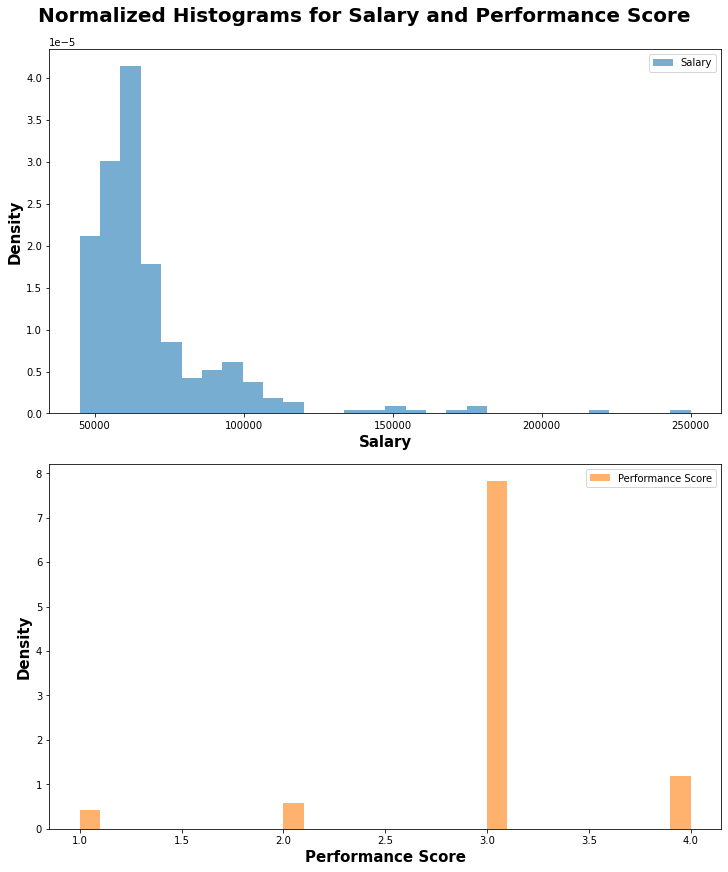

In [29]:
# Extract the numerical data sets for comparison
salary = df['Salary']
performance_score = df['PerfScoreID']
fig, axs = plt.subplots(2, 1, figsize=(10, 12), constrained_layout=True)
fig.suptitle('Normalized Histograms for Salary and Performance Score', weight='bold', fontsize=20)
bins = 30

# Salary
axs[0].hist(salary, bins=bins, density=True, alpha=0.6, color='tab:blue', label='Salary')
axs[0].set_xlabel('Salary', weight='bold', fontsize=15)
axs[0].set_ylabel('Density', weight='bold', fontsize=15)
axs[0].legend()

# Performance Score
axs[1].hist(performance_score, bins=bins, density=True, alpha=0.6, color='tab:orange', label='Performance Score')
axs[1].set_xlabel('Performance Score', weight='bold', fontsize=15)
axs[1].set_ylabel('Density', weight='bold', fontsize=15)
axs[1].legend()
plt.show()

# Heart Disease Prediction 🩺❤️

In [30]:
heart = pd.read_csv('heart.csv')
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## **Box Plots:**
1. Create a box plot for a given numerical data set.
2. Generate multiple box plots in a single figure to compare different data sets.
3. Customize the box plots with titles, labels, and change the colors.
## 1. Create a box plot for a given numerical data set.

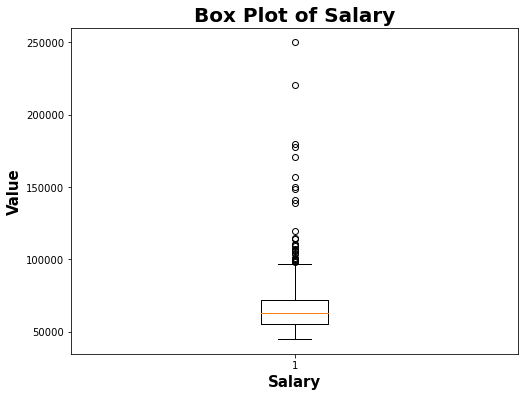

In [31]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Salary'])
plt.title('Box Plot of Salary', weight='bold', fontsize=20)
plt.xlabel('Salary', weight='bold', fontsize=15)
plt.ylabel('Value', weight='bold', fontsize=15)
plt.show()

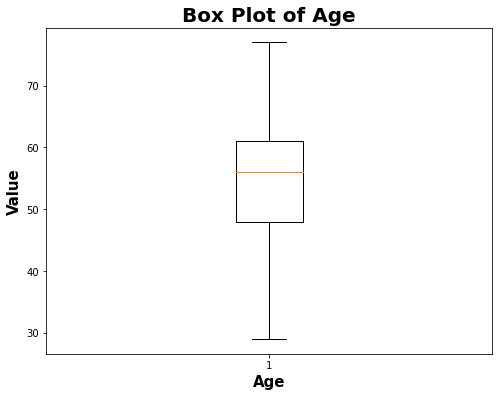

In [32]:
plt.figure(figsize=(8, 6))
plt.boxplot(heart['age'])
plt.title('Box Plot of Age', weight='bold', fontsize=20)
plt.xlabel('Age', weight='bold', fontsize=15)
plt.ylabel('Value', weight='bold', fontsize=15)
plt.show()

## 2. Generate multiple box plots in a single figure to compare different data sets.

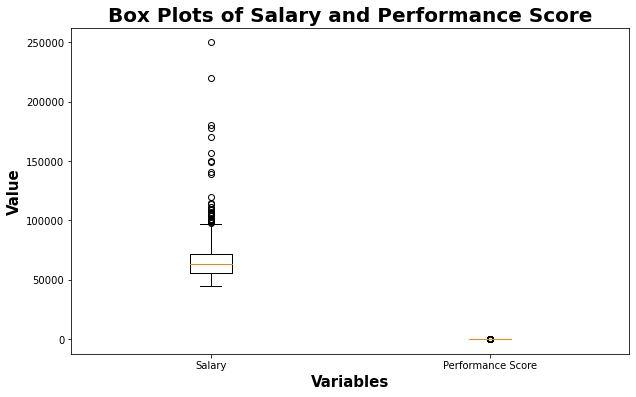

In [33]:
plt.figure(figsize=(10, 6))
plt.boxplot([df['Salary'], df['PerfScoreID']], labels=['Salary', 'Performance Score'])
plt.title('Box Plots of Salary and Performance Score', weight='bold', fontsize=20)
plt.xlabel('Variables', weight='bold', fontsize=15)
plt.ylabel('Value', weight='bold', fontsize=15)
plt.show()

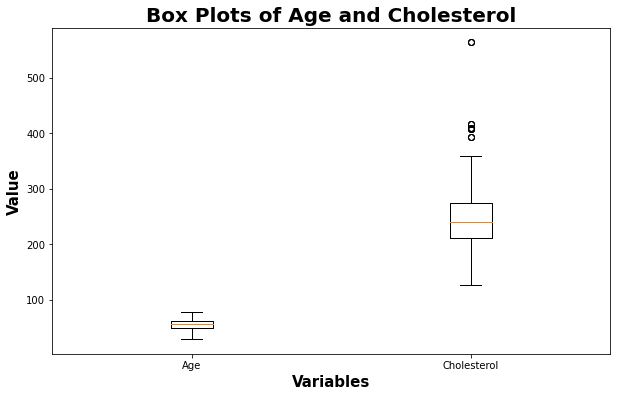

In [34]:
plt.figure(figsize=(10, 6))
plt.boxplot([heart['age'], heart['chol']], labels=['Age', 'Cholesterol'])
plt.title('Box Plots of Age and Cholesterol', weight='bold', fontsize=20)
plt.xlabel('Variables', weight='bold', fontsize=15)
plt.ylabel('Value', weight='bold', fontsize=15)
plt.show()

## 3. Customize the box plots with titles, labels, and change the colors.

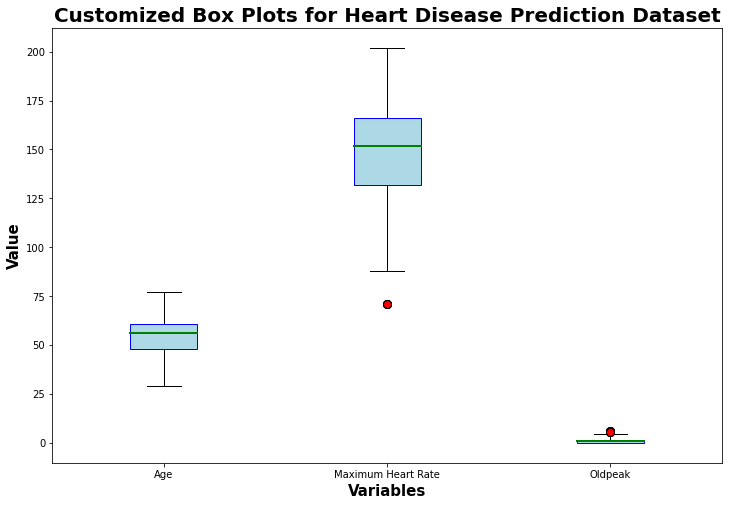

In [35]:
plt.figure(figsize=(12, 8))
plt.boxplot([heart['age'], heart['thalach'], heart['oldpeak']],
            labels=['Age', 'Maximum Heart Rate', 'Oldpeak'],
            patch_artist=True,  # Enable custom colors
            boxprops=dict(facecolor='lightblue', color='blue'),  # Box color
            whiskerprops=dict(color='black'),  # Whisker color
            capprops=dict(color='black'),  # Cap color
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none'),  # Flier color
            medianprops=dict(color='green', linewidth=2)  # Median line color
           )
plt.title('Customized Box Plots for Heart Disease Prediction Dataset', weight='bold', fontsize=20)
plt.xlabel('Variables', weight='bold', fontsize=15)
plt.ylabel('Value', weight='bold', fontsize=15)
plt.show()

# **The End :)**